In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.optimizers import Adam
# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

import os

#suppress tensorflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#group 2412

#Vittoria Bettio 2122414
#Chiara Tramarin 1193231
#Alessio Tuscano 1193922
#Cesare Beccarelli 2122538

2024-03-30 17:35:27.638827: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 17:35:27.668057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 17:35:27.668083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 17:35:27.668927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-30 17:35:27.673677: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 17:35:27.674031: I tensorflow/core/platform/cpu_feature_guard.cc:1

XGBoost version: 2.0.3


In [2]:
np.random.seed(12345)

dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])
print(x)
N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")


[[-31.608 -29.544   6.773   9.554]
 [ 46.451  15.318  24.891  15.357]
 [ 24.771  46.131 -49.161 -39.356]
 ...
 [ 20.735 -13.29  -15.862  19.367]
 [-12.471 -36.369 -13.906   0.148]
 [  8.435  -9.48  -12.859 -37.919]]
N=4000, N_train=3000, L=4


[-31.608 -29.544   6.773   9.554] 0
[46.451 15.318 24.891 15.357] 1
[ 24.771  46.131 -49.161 -39.356] 1
[-20.13   15.641  30.981  37.218] 1
[46.465 22.369 14.248 21.745] 1


IndexError: index 2 is out of bounds for axis 1 with size 2

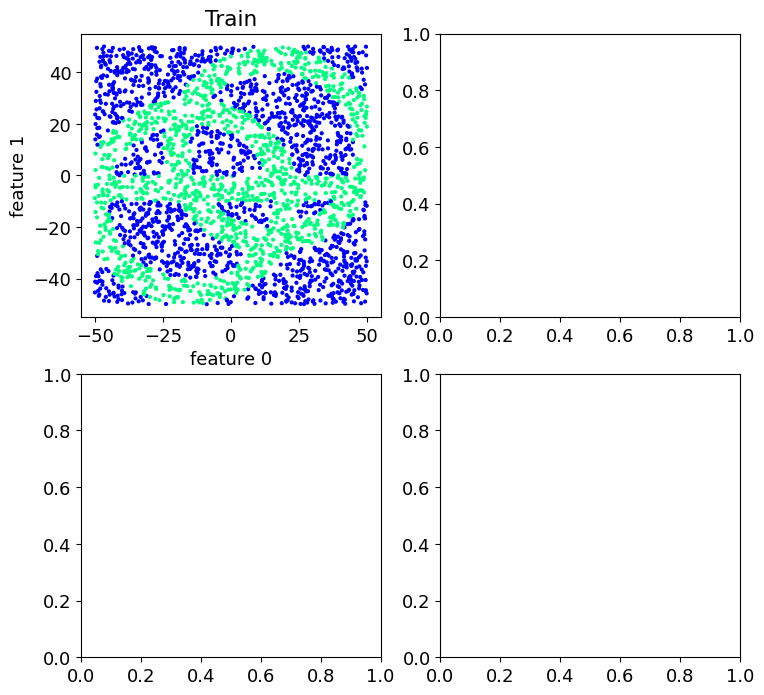

In [57]:
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

for n in range(5):
    print(x[n],y[n])

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

In [4]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test, y_test)),clf.score(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
      #  fig, AX = plt.subplots(2,1,figsize=(12, 5))
        # for i in range(min(2,num_trees)):
       #     ax=AX[i]
       #     plot_tree(clf, num_trees=i, ax=ax)
       # fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
       # plt.show()

### Classify
If the “objective” hyperparameter is left unspecified, XGBClassifier looks at the data and chooses automatically the loss functions and the evaluation metrics (--> WARNING)

## XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html

errors: 5.20%   Accuracy=0.948


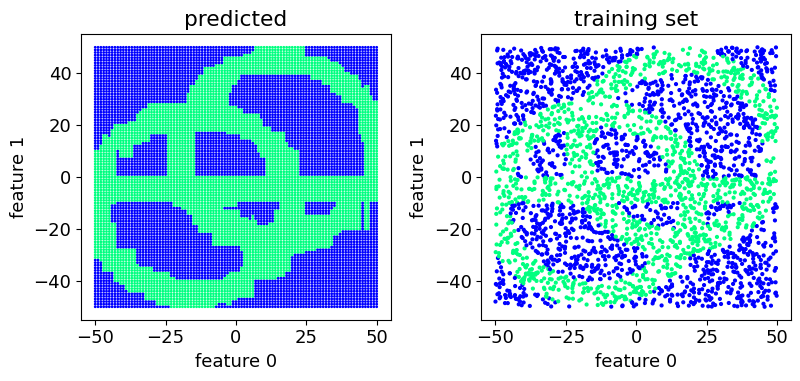

num_trees= 100


In [5]:
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

classify(model, show=True)

In [6]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the model
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

lamb = np.geomspace(1e-5,1,6)
lamb0 = np.concatenate(([0],lamb))
n_est = np.linspace(10,200,20, dtype=int)
gamma = np.geomspace(1e-7,1e-1,7) 

# Define parameters grid
parameters = {
    'lambda': lamb0,
    'n_estimators': n_est,
    'gamma': gamma #scale: inverse of variance of features, auto:inverse of N of features
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print best parameters found
print("Best parameters:", grid_search.best_params_)

# Get best estimator
best_model = grid_search.best_estimator_

#history = grid_result.best_estimator_.model.model.history.history
fit_history = pd.DataFrame(grid_search.cv_results_)
# Evaluate on test set
test_score = best_model.score(x_test, y_test)
print("Accuracy on test set:", test_score)
#print(fit_history)


Best parameters: {'gamma': 1e-07, 'lambda': 0.1, 'n_estimators': 110}
Accuracy on test set: 0.9333333333333333


# best model
## the best model was found through a grid search with a total of 960 fits:
## the best parameters found for a  are: gamma=0.01; lambda=0.0001; n_estimators=136
## we are saving the best model found for future comparison with the other models
## as seen with the grid search best lambda was a lambda different than 0, so regularization is useful for this problem.
### we have seen that changing the test size greatly affect the accuracy performance 
### of the search as this algorithm is very dependent on test data

In [7]:
def modelshow(model,show=True):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)

    y_hat = model.predict(x_test)
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-model.score(x_test, y_test)),model.score(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= model.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = model.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(model, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

In [35]:
def modelshowNN(model,show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)

    y_hat = model.predict(x_test)
    
    #print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-model.evaluate(x_test, y_test)),model.evaluate(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= model.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = model.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(model, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

In [9]:
#modelshow(best_model)

None
[0.45141712 0.41601273 0.06188538 0.07068481]


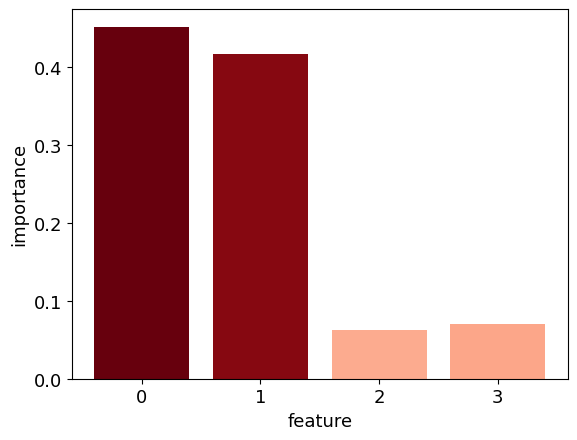

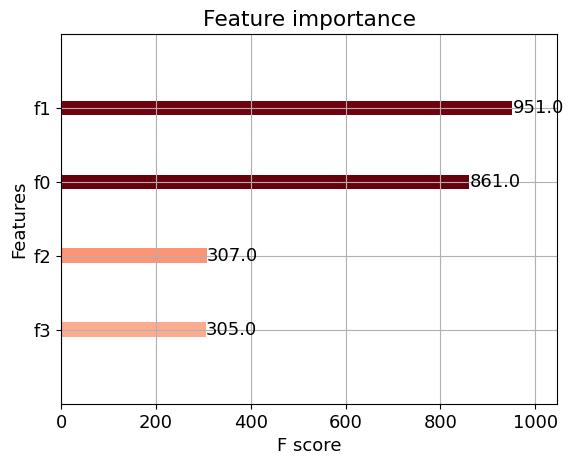

In [10]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# feature importance
model = best_model
print(model.importance_type)
print(model.feature_importances_)
# plot
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: 0.3 + 0.7 * (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=my_cmap(rescale(model.feature_importances_)))
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(np.arange(L))
plt.title(model.importance_type)
plt.show()

rescale_r = lambda y: 0.3 + 0.7 * (np.max(y) - y) / (np.max(y) - np.min(y))
plot_importance(model,color=my_cmap(rescale_r(model.feature_importances_)))
plt.show()

Documentation: https://xgboost.readthedocs.io/en/stable/python/python_api.html

    ‘weight’: the number of times a feature is used to split the data across all trees.

    ‘gain’: the average gain across all splits the feature is used in.

    ‘cover’: the average coverage across all splits the feature is used in.

    ‘total_gain’: the total gain across all splits the feature is used in.

    ‘total_cover’: the total coverage across all splits the feature is used in.


0 weight [861. 951. 307. 305.]
1 gain [3.93616486 3.6274538  0.53961414 0.61634141]
2 total_gain [3389.0378418  3449.70849609  165.6615448   187.98413086]
3 cover [45.92329025 50.87319565 41.11956024 49.29175949]
4 total_cover [39539.953125   48380.41015625 12623.70507812 15033.98632812]


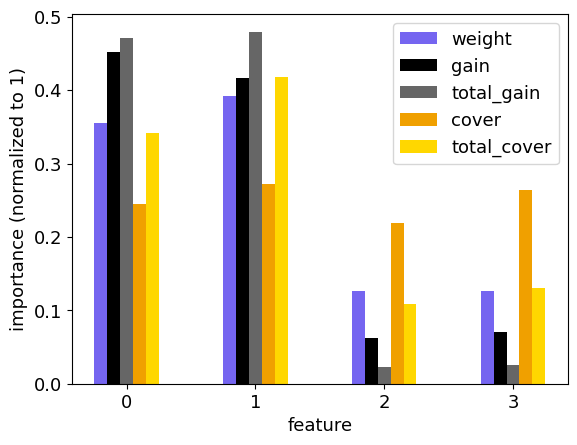

In [11]:
# if the importance type is “total_gain”, then the score is sum of loss change for each split from all trees.
list_type=["weight","gain","total_gain","cover","total_cover"]
list_col=["#7565F0","k","#666666","#F0A000","gold"]

for i,t in enumerate(list_type):
    feature_imp = model.get_booster().get_score(importance_type=t)
    keys = list(feature_imp.keys())
    values = np.array(list(feature_imp.values()))
    print(i,t,values)
    values= values/np.sum(values)
    plt.bar(np.arange(L)+(i-L/2)/10, values,color=list_col[i],width=0.1,label=t)
plt.xlabel("feature")
plt.ylabel("importance (normalized to 1)")
plt.xticks(np.arange(L))
plt.legend()
plt.show()

# Dimensionality Reduction


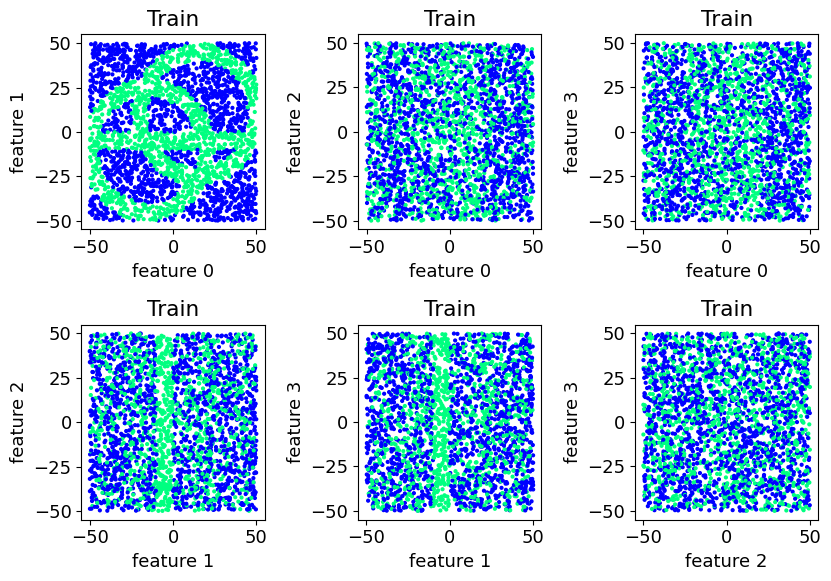

In [12]:
fig,AX = plt.subplots(2,3,figsize=(8.5,6))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=0,j=2,title="Train")
scat(AX[0,2],x_train,y_train,i=0,j=3,title="Train")
scat(AX[1,0],x_train,y_train,i=1,j=2,title="Train")
scat(AX[1,1],x_train,y_train,i=1,j=3,title="Train")
scat(AX[1,2],x_train,y_train,i=2,j=3,title="Train")

fig.tight_layout()
plt.show()

# Given that feature 2 and 3 appear to be redundant, we aim to reduce dimensionality by eliminating feature 3. Additionally, we will explore using only the first two features, which exhibit lower levels of chaos, in an effort to simplify the dataset.




In [13]:
def classify_red(x_train_red, x_test_red, clf=GradientBoostingClassifier(), show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train_red,y_train)
    y_hat = clf.predict(x_test_red)
    L=len(x_test_red[0])
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test_red, y_test)),clf.score(x_test_red, y_test)))
    S=50
    dx = 0.5
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)
    
    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    fig.suptitle(f"Reducted dataset with {L} features")
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train_red[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

In [14]:
x_train_red_3 = x_train[:, :3]
x_test_red_3 = x_test[:, :3]

x_train_red_2 = x_train[:, :2]
x_test_red_2 = x_test[:, :2]

errors: 5.33%   Accuracy=0.947


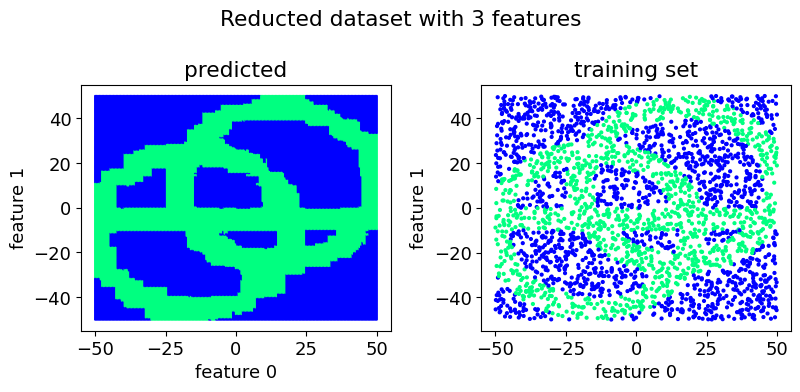

num_trees= 100


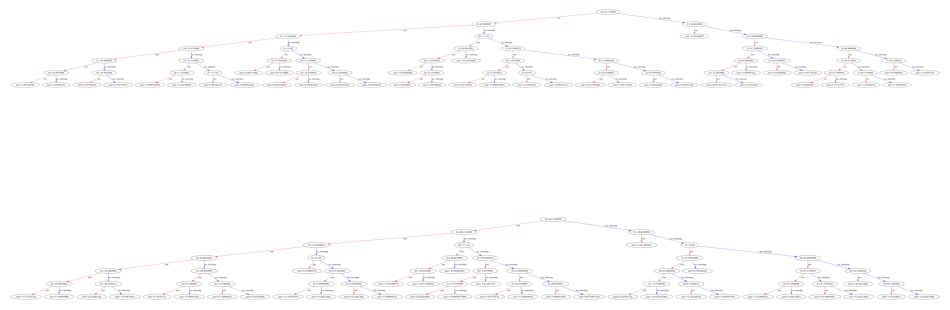

errors: 4.42%   Accuracy=0.956


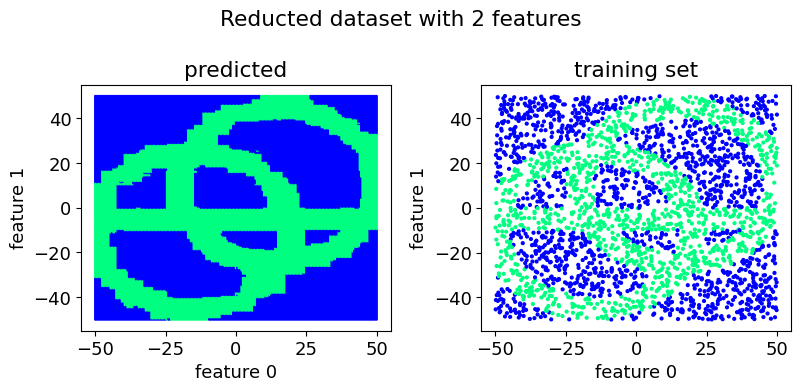

num_trees= 100


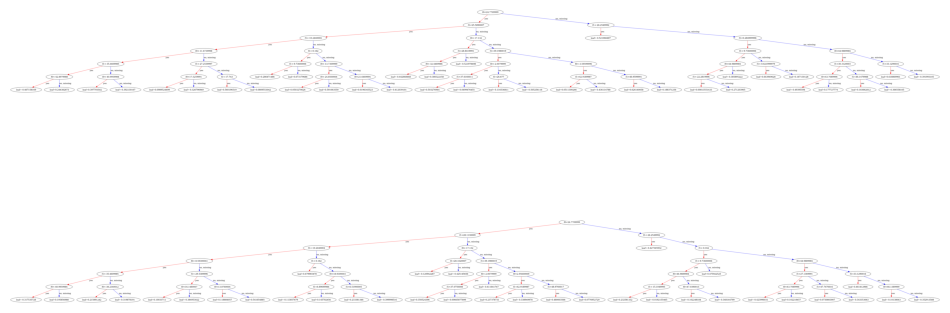

In [15]:
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

classify_red(x_train_red_3, x_test_red_3, model, show=True)
classify_red(x_train_red_2, x_test_red_2, model, show=True)

# Accuracy with data reduction
## The highest accuracy was achieved when using solely the first two features.

## normal Gradient Boosting

errors: 16.92%   Accuracy=0.831


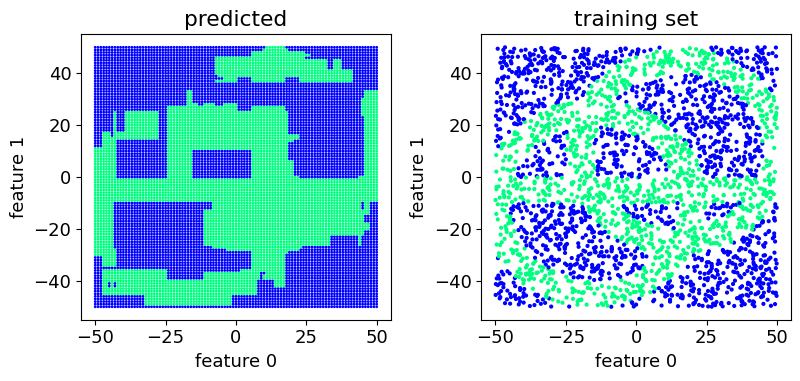

In [16]:
# GradientBoostingClassifier()
classify()

## AdaBoost

/home/alessio/venv-3.10/lib64/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


errors: 29.42%   Accuracy=0.706


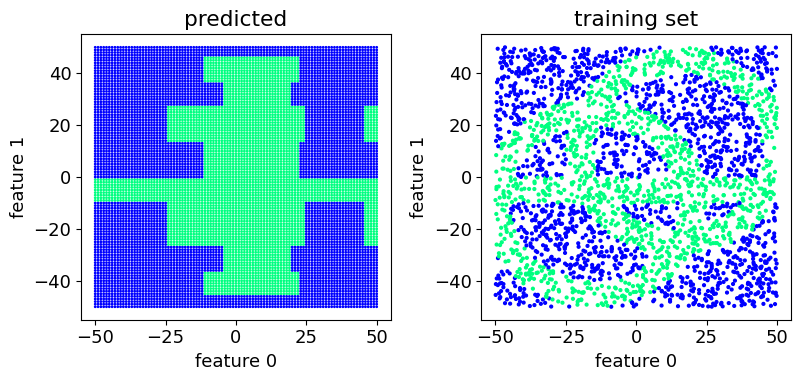

In [17]:
classify(clf=AdaBoostClassifier())

## NN


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#from scikeras.wrappers import KerasClassifier

In [19]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.1, random_state=42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.25, random_state=42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.5, random_state=42)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x, y, test_size=0.75, random_state=42)

In [20]:
x_red = x[:,:2]
x_train_1, x_test_1 = x_train_1[:,:2], x_test_1[:,:2]
x_train_2, x_test_2 = x_train_2[:,:2], x_test_2[:,:2]
x_train_3, x_test_3 = x_train_3[:,:2], x_test_3[:,:2]
x_train_4, x_test_4 = x_train_4[:,:2], x_test_4[:,:2]

In [21]:
def create_model(layers: list, optimizer ='adam', input_dim = 2, activation = 'relu' ):
    model = Sequential()
    model.add(Dense(units= layers[0], input_dim=input_dim, activation='relu'))
    for i in range(1, len(layers)):
        model.add(Dense(units = layers[i], activation='relu'))
        print(i)
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    print(model.summary())

    return model


In [22]:
model2 = create_model([100,50,20,10])
model2.fit(x_train_2, y_train_2, epochs = 200, batch_size = 50, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model2.evaluate(x_test_2, y_test_2)
print("Test Accuracy: %.2f%%" % (accuracy * 100))

1
2
3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6591 (25.75 KB)
Trainable params: 6591 (25.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200

## Cross Validation


In [23]:
'''kfold = KFold(n_splits=4, shuffle=True, random_state=42)
model = create_model()
accuracy_scores = []
for train_index, test_index in kfold.split(x_red):
    X_train, X_test = x_red[train_index], x_red[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create the Keras model
    model = create_model()
    
    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy: %.2f%%" % (mean_accuracy * 100))'''

'kfold = KFold(n_splits=4, shuffle=True, random_state=42)\nmodel = create_model()\naccuracy_scores = []\nfor train_index, test_index in kfold.split(x_red):\n    X_train, X_test = x_red[train_index], x_red[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    \n    # Create the Keras model\n    model = create_model()\n    \n    # Train the model\n    model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)\n    \n    # Evaluate the model\n    _, accuracy = model.evaluate(X_test, y_test, verbose=0)\n    accuracy_scores.append(accuracy)\n\n# Calculate and print the mean accuracy\nmean_accuracy = sum(accuracy_scores) / len(accuracy_scores)\nprint("Mean Accuracy: %.2f%%" % (mean_accuracy * 100))'

## XGBoost vs NN
 The test accuracy of a NN approached 91% with a 0.25 test size, while xgboost approached 94% accuracy with the same setup
 if we consider a reduced data xgboost approached 95% accuracy while being faster to fit 
 the average accuracy with a NN was 82.5% which is significantly lower than the average accuracy of a non-optimized xgboost fit

In [24]:
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.callbacks import EarlyStopping

1
2
3
4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               600       
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 26991 (105.43 KB)
Trainable para

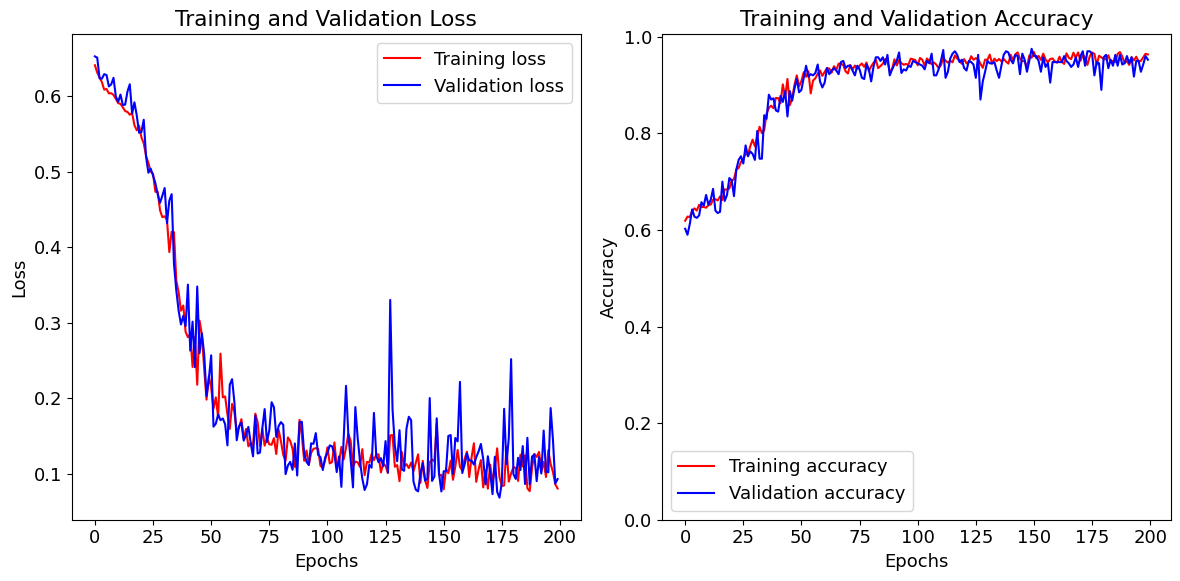

In [25]:
optimizer = 'adam'
model3 = create_model([200,100,50,20,10], optimizer = optimizer)
epochs = 200
epochs_v = np.arange(0,epochs)


#early_s = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model3.fit(x_train_2, y_train_2, epochs = epochs, batch_size = 50, verbose=1, validation_data = (x_test_1, y_test_1))
train_accuracy = model3.history.history['accuracy']
val_accuracy = model3.history.history['val_accuracy']
train_loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']
loss, accuracy = model3.evaluate(x_test_3, y_test_3)
print("Test Accuracy: %.2f%%" % (accuracy * 100))


#Plotting results
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_v, train_loss, 'r', label='Training loss')
plt.plot(epochs_v, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_v, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs_v, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0,1.005)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1
2
3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 20)                1020      
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6591 (25.75 KB)
Trainable params: 6591 (25.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/2

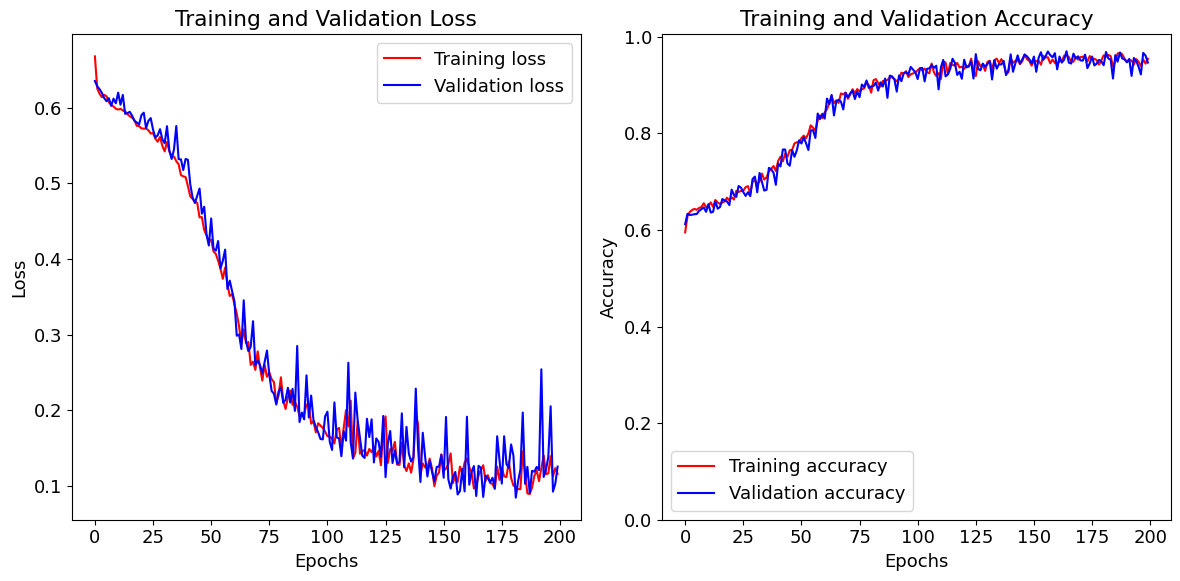

In [26]:
# we decided to use this deep learning model as it after various tentative this one is the smallest one that gives us optimal results
model3 = create_model([100,50,20,10])
epochs = 200
epochs_v = np.arange(0,epochs)
#early_s = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model3.fit(x_train_2, y_train_2, epochs = epochs, batch_size = 50, verbose=1, validation_data = (x_test_3, y_test_3))
train_accuracy = model3.history.history['accuracy']
val_accuracy = model3.history.history['val_accuracy']
train_loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']
loss, accuracy = model3.evaluate(x_test_3, y_test_3)
print("Test Accuracy: %.2f%%" % (accuracy * 100))


#Plotting results
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_v, train_loss, 'r', label='Training loss')
plt.plot(epochs_v, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_v, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs_v, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0,1.005)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
'''kfold = KFold(n_splits=4, shuffle=True, random_state=42)
accuracy_scores = []
for train_index, test_index in kfold.split(x_red):
    X_train, X_test = x_red[train_index], x_red[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create the Keras model
    model = create_model([100,50,20,10])
    
    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy: %.2f%%" % (mean_accuracy * 100))'''

'kfold = KFold(n_splits=4, shuffle=True, random_state=42)\naccuracy_scores = []\nfor train_index, test_index in kfold.split(x_red):\n    X_train, X_test = x_red[train_index], x_red[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    \n    # Create the Keras model\n    model = create_model([100,50,20,10])\n    \n    # Train the model\n    model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)\n    \n    # Evaluate the model\n    _, accuracy = model.evaluate(X_test, y_test, verbose=0)\n    accuracy_scores.append(accuracy)\n\n# Calculate and print the mean accuracy\nmean_accuracy = sum(accuracy_scores) / len(accuracy_scores)\nprint("Mean Accuracy: %.2f%%" % (mean_accuracy * 100))'

In [33]:
def create_DNN(activation, size, layers, lamb, L=4):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Input(shape=(L,)))
    for i in range(layers):
        model.add(Dense(size, activation=activation, kernel_regularizer=l2(lamb)))
    model.add(Dense(1, activation='sigmoid')) #sigmoid for the last layer to have a nice probability interpretation between 1 and 0

    return model

def compile_model(optimizer, activation, size, layers, lamb,L=4):
    # create the mode
    model = create_DNN(activation, size, layers, lamb,L=4)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [29]:
# best_model with NN and full dataset

In [36]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import keras
from tensorflow.keras.regularizers import l2
import time
import pandas

#suppress tensorflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

dname = "./DATA/"
str0 = "_XGB_24.dat"
fnamex = dname + 'x' + str0
fnamey = dname + 'y' + str0
x = np.loadtxt(fnamex, delimiter=" ", dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 
#using test size 0.25 as it was the best performer in the earlier test

# call Keras  wrapper
batch_size = 10
epochs = 200
model_gridsearch = KerasClassifier(model=compile_model,
                                   epochs=epochs,
                                   batch_size=batch_size,
                                   verbose=0)

lamb = np.geomspace(1e-5,1,6)
lamb0 = np.concatenate(([0],lamb))

# list of allowed optional arguments for the optimizer, see `compile_model()`
model__optimizer = ['Adam']#, 'Nadam']
model__activation = ['relu'] #'gelu', 'sigmoid']
model__size = [20]#[10, 20, 50]
model__layers = [4]#[3,4,5]
model__lamb = [0.01]# + list(np.geomspace(1e-5, .1, 5))  # Set regularization parameter as a scalar
# define parameter dictionary
param_grid = dict(model__optimizer=model__optimizer, model__activation=model__activation, model__size=model__size, model__layers=model__layers, model__lamb=model__lamb)
fitstart = time.time()
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=5, verbose=True,  error_score='raise')

grid_result = grid.fit(x_train, y_train)
fitend=time.time()
print(f'Time passed for fit: {fitend-fitstart:.1f} seconds')
# summarize results-
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

params = grid_result.best_params_  # best params

#get all the history
fit_history = pd.DataFrame(grid_search.cv_results_)
#print(fit_history)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
parameters = grid_result.cv_results_['params']
with open("grid.txt", "w") as my_file:
    for mean, stdev, parameter in zip(means, stds, parameters):
        my_file.write("%f (%f) with: %r\n" % (mean, stdev, parameter))

# Get best estimator
best_modelNN = grid_result.best_estimator_

#history = grid_result.best_estimator_.model.model.history.history
fit_history = pd.DataFrame(grid_result.cv_results_)



#print(fit_history)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time passed for fit: 275.2 seconds
Best: 0.920333 using {'model__activation': 'relu', 'model__lamb': 0.01, 'model__layers': 4, 'model__optimizer': 'Adam', 'model__size': 20}


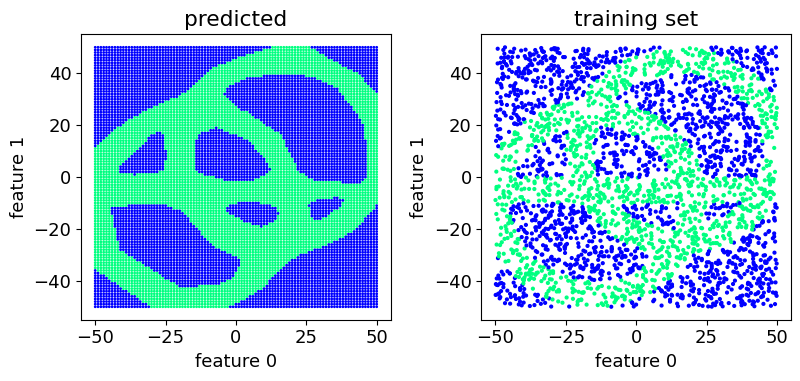

In [37]:
#works with these library versions, otherwise throws errors

#tensorflow==2.15
#!pip install --upgrade scikit-learn==1.4.1.post1
modelshowNN(best_modelNN)

319/319 [==============================] - 1s 4ms/step


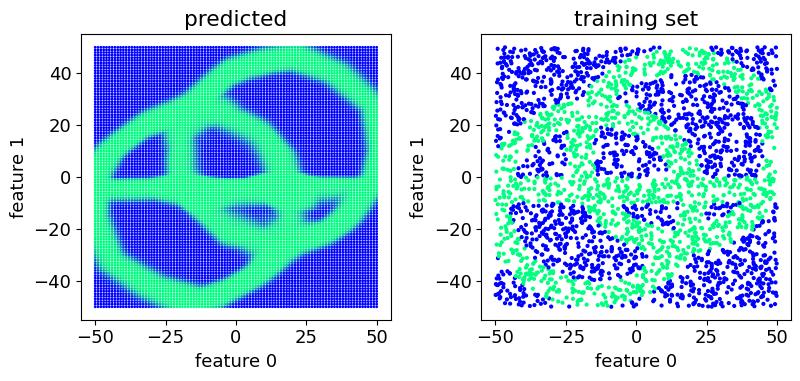

In [38]:
# Get best estimator for full dataset
#Best: 0.928667 using {'model__activation': 'relu', 'model__lamb': 0.01, 'model__layers': 4, 'model__optimizer': 'Adam', 'model__size': 20}
# best params for 93% accuracy with original non reduced data
best_lamb=0.01
best_layers = 4
best_size = 20

dname = "./DATA/"
str0 = "_XGB_24.dat"
fnamex = dname + 'x' + str0
fnamey = dname + 'y' + str0
x = np.loadtxt(fnamex, delimiter=" ", dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 
#using test size 0.25 as it was the best performer in the earlier test

best_modelNNman = compile_model('Adam','relu',best_size,best_layers,best_lamb,L=4)
best_modelNNman.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)
modelshowNN(best_modelNNman)

In [39]:
# best_model with NN and reduced dataset

In [40]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import keras
from tensorflow.keras.regularizers import l2
import time
import pandas as pd
#suppress tensorflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

dname = "./DATA/"
str0 = "_XGB_24.dat"
fnamex = dname + 'x' + str0
fnamey = dname + 'y' + str0
x = np.loadtxt(fnamex, delimiter=" ", dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)


x_red = x[:,:2]
N,L = len(x_red), len(x_red[0])
print(N,L)
# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=0.25, random_state=42) 
#using test size 0.25 as it was the best performer in the earlier test

def create_DNN2(activation, size, layers, lamb):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Input(shape=(L,)))
    for i in range(layers):
        model.add(Dense(size, activation=activation, kernel_regularizer=l2(lamb)))
    model.add(Dense(1, activation='sigmoid')) #sigmoid for the last layer to have a nice probability interpretation between 1 and 0

    return model

def compile_model2(optimizer, activation, size, layers, lamb):
    # create the mode
    model = create_DNN2(activation, size, layers, lamb)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# call Keras  wrapper
batch_size = 10
epochs = 200
model_gridsearch = KerasClassifier(model=compile_model2,
                                   epochs=epochs,
                                   batch_size=batch_size,
                                   verbose=0)

lamb = np.geomspace(1e-5,1,6)
lamb0 = np.concatenate(([0],lamb))

# list of allowed optional arguments for the optimizer, see `compile_model()`
model__optimizer = ['Adam']#, 'Nadam']
model__activation = ['relu'] #'gelu', 'sigmoid']
model__size = [50]#[10,20,50]
model__layers = [5]#[5,6,7]
model__lamb = [1e-05]#[0.0] + list(np.geomspace(1e-5, 0.1, 5))  # Set regularization parameter as a scalar
# define parameter dictionary
param_grid = dict(model__optimizer=model__optimizer, model__activation=model__activation, model__size=model__size, model__layers=model__layers, model__lamb=model__lamb)
fitstart = time.time()
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=5, verbose=True,  error_score='raise')

grid_result = grid.fit(x_train, y_train)
fitend=time.time()
print(f'Time passed for fit: {fitend-fitstart:.1f} seconds')
# summarize results-
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

paramsred = grid_result.best_params_  # best params

#get all the history
fit_historyred = pd.DataFrame(grid.cv_results_)
#print(fit_history)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
parameters = grid_result.cv_results_['params']
with open("gridred2.txt", "w") as my_file:
    for mean, stdev, parameter in zip(means, stds, parameters):
        my_file.write("%f (%f) with: %r\n" % (mean, stdev, parameter))


# Get best estimator
best_modelNNred = grid_result.best_estimator_

#history = grid_result.best_estimator_.model.model.history.history
fit_history = pd.DataFrame(grid_result.cv_results_)



#print(fit_history)

4000 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time passed for fit: 322.0 seconds
Best: 0.948667 using {'model__activation': 'relu', 'model__lamb': 1e-05, 'model__layers': 5, 'model__optimizer': 'Adam', 'model__size': 50}


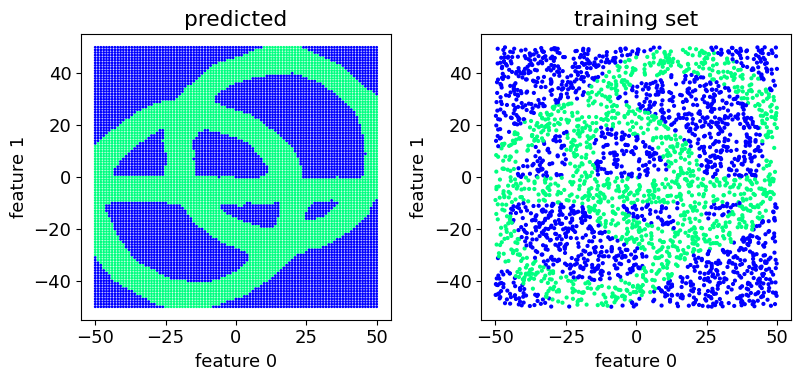

In [41]:
#show test plot of best reduced NN model
modelshowNN(best_modelNNred)

319/319 [==============================] - 1s 3ms/step


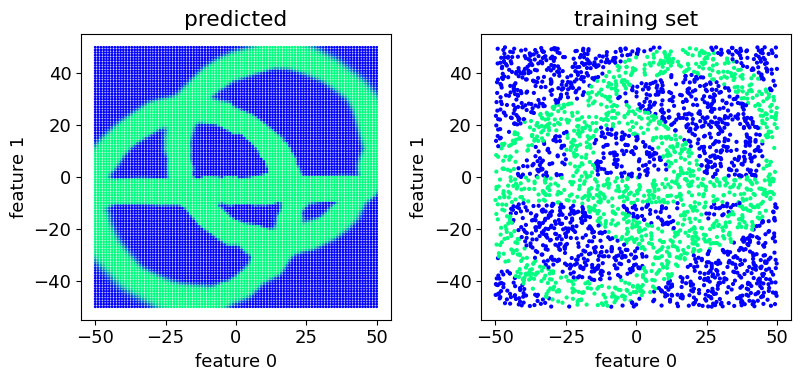

In [53]:
# Get best estimator for reduced dataset
#Best: 0.950000 using {'model__activation': 'relu', 'model__lamb': 1e-05, 'model__layers': 5, 'model__optimizer': 'Adam', 'model__size': 50}

# best params for 95% accuracy with reduced data
best_lamb=1e-05
best_layers = 5
best_size = 50

dname = "./DATA/"
str0 = "_XGB_24.dat"
fnamex = dname + 'x' + str0
fnamey = dname + 'y' + str0
x = np.loadtxt(fnamex, delimiter=" ", dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)

x_red = x[:,:2]
N,L = len(x_red), len(x_red[0])


# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=0.25, random_state=42) 
#using test size 0.25 as it was the best performer in the earlier test

#x_train, x_test = x_train[:,:2], x_test[:,:2]

best_modelNNredman = compile_model2('Adam','relu',best_size,best_layers,best_lamb)
best_modelNNredman.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)
modelshowNN(best_modelNNredman)


In [54]:
# best_model with xgboost and reduced dataset

Best parameters: {'gamma': 0.01, 'lambda': 0.0, 'n_estimators': 120}
Accuracy on test set: 0.95
errors: 5.00%   Accuracy=0.950


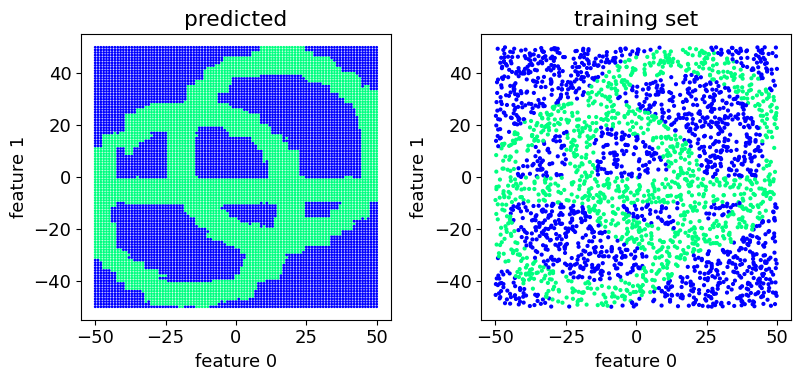

num_trees= 120


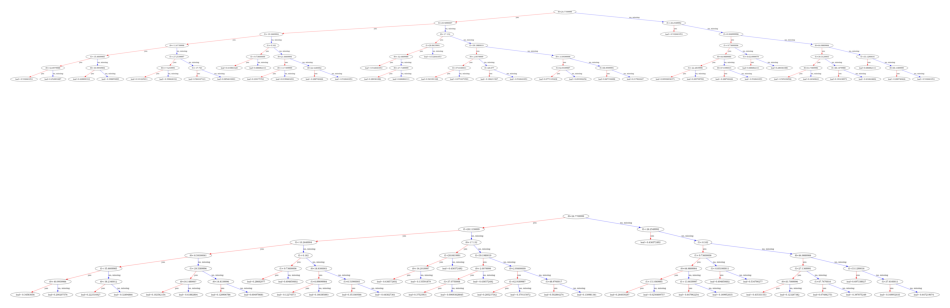

In [55]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=0.3, random_state=42)

# Define the model
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

lamb = np.geomspace(1e-5,1,6)
lamb0 = np.concatenate(([0],lamb))
n_est = np.linspace(10,200,20, dtype=int)
gamma = np.geomspace(1e-7,1e-1,7) 

# Define parameters grid
parameters = {
    'lambda': lamb0,
    'n_estimators': n_est,
    'gamma': gamma #scale: inverse of variance of features, auto:inverse of N of features
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print best parameters found
print("Best parameters:", grid_search.best_params_)

# Get best estimator
best_modelred = grid_search.best_estimator_

#history = grid_result.best_estimator_.model.model.history.history
fit_history = pd.DataFrame(grid_search.cv_results_)
# Evaluate on test set
test_score = best_modelred.score(x_test, y_test)
print("Accuracy on test set:", test_score)
#print(fit_history)

modelshow(best_modelred)

In [62]:
# best_model with xgboost and full dataset

dname = "./DATA/"
str0 = "_XGB_24.dat"
fnamex = dname + 'x' + str0
fnamey = dname + 'y' + str0
x = np.loadtxt(fnamex, delimiter=" ", dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the model
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

lamb = np.geomspace(1e-5,1,6)
lamb0 = np.concatenate(([0],lamb))
n_est = np.linspace(10,200,20, dtype=int)
gamma = np.geomspace(1e-7,1e-1,7) 

# Define parameters grid
parameters = {
    'lambda': lamb0,
    'n_estimators': n_est,
    'gamma': gamma #scale: inverse of variance of features, auto:inverse of N of features
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print best parameters found
print("Best parameters:", grid_search.best_params_)

# Get best estimator
best_model = grid_search.best_estimator_

#history = grid_result.best_estimator_.model.model.history.history
fit_history = pd.DataFrame(grid_search.cv_results_)
# Evaluate on test set
test_score = best_model.score(x_test, y_test)
print("Accuracy on test set:", test_score)
#print(fit_history)



Best parameters: {'gamma': 1e-07, 'lambda': 0.1, 'n_estimators': 110}
Accuracy on test set: 0.9333333333333333
errors: 6.67%   Accuracy=0.933


ValueError: Feature shape mismatch, expected: 4, got 2

In [63]:
modelshow(best_model)

errors: 6.67%   Accuracy=0.933


ValueError: Feature shape mismatch, expected: 4, got 2